In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [ ]:

columns = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach",
           "exang","oldpeak","slope","ca","thal","target"]

data = pd.read_csv('/content/processed.cleveland[1].data',names = columns ,na_values="?", header = None)



data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


<Axes: >

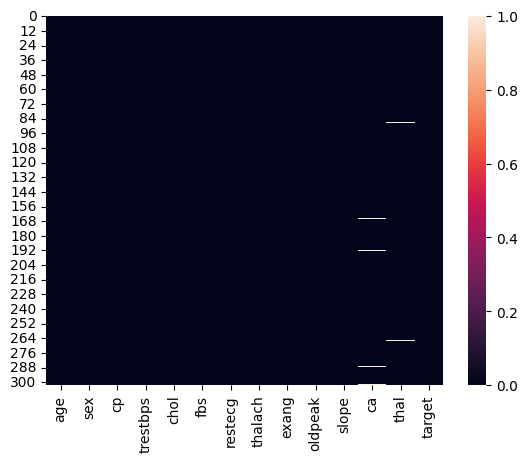

In [ ]:
sns.heatmap(data.isnull())

In [ ]:
data.isnull().sum()[data.isnull().sum()>0]

,0
ca,4
thal,2


In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


**data encoding**

In [ ]:
data_encoded =pd.get_dummies(data , columns=["cp","sex","restecg","ca","slope","thal"] , drop_first=True)

In [ ]:
print(data_encoded.head())


    age  trestbps   chol  fbs  thalach  exang  oldpeak  target  cp_2.0  \
0  63.0     145.0  233.0  1.0    150.0    0.0      2.3       0   False   
1  67.0     160.0  286.0  0.0    108.0    1.0      1.5       2   False   
2  67.0     120.0  229.0  0.0    129.0    1.0      2.6       1   False   
3  37.0     130.0  250.0  0.0    187.0    0.0      3.5       0   False   
4  41.0     130.0  204.0  0.0    172.0    0.0      1.4       0    True   

   cp_3.0  ...  sex_1.0  restecg_1.0  restecg_2.0  ca_1.0  ca_2.0  ca_3.0  \
0   False  ...     True        False         True   False   False   False   
1   False  ...     True        False         True   False   False    True   
2   False  ...     True        False         True   False    True   False   
3    True  ...     True        False        False   False   False   False   
4   False  ...    False        False         True   False   False   False   

   slope_2.0  slope_3.0  thal_6.0  thal_7.0  
0      False       True      True     False  


In [ ]:
data_encoded = data_encoded.astype(int , errors='ignore')

In [ ]:
print(data_encoded.head())

   age  trestbps  chol  fbs  thalach  exang  oldpeak  target  cp_2.0  cp_3.0  \
0   63       145   233    1      150      0        2       0       0       0   
1   67       160   286    0      108      1        1       2       0       0   
2   67       120   229    0      129      1        2       1       0       0   
3   37       130   250    0      187      0        3       0       0       1   
4   41       130   204    0      172      0        1       0       1       0   

   ...  sex_1.0  restecg_1.0  restecg_2.0  ca_1.0  ca_2.0  ca_3.0  slope_2.0  \
0  ...        1            0            1       0       0       0          0   
1  ...        1            0            1       0       0       1          1   
2  ...        1            0            1       0       1       0          1   
3  ...        1            0            0       0       0       0          0   
4  ...        0            0            1       0       0       0          0   

   slope_3.0  thal_6.0  thal_7.0  
0  

**data scalling**

In [ ]:
num_columns = ["age", "trestbps", "chol", "thalach", "oldpeak"]
data_scaled = data_encoded.copy()
scaler = StandardScaler()
data_scaled[num_columns]=scaler.fit_transform(data_scaled[num_columns])

In [ ]:
print(data_scaled.head())

        age  trestbps      chol  fbs   thalach  exang   oldpeak  target  \
0  0.936181  0.750380 -0.276443    1  0.017494      0  1.136764       0   
1  1.378929  1.596266  0.744555    0 -1.816334      1  0.206684       2   
2  1.378929 -0.659431 -0.353500    0 -0.899420      1  1.136764       1   
3 -1.941680 -0.095506  0.051047    0  1.633010      0  2.066844       0   
4 -1.498933 -0.095506 -0.835103    0  0.978071      0  0.206684       0   

   cp_2.0  cp_3.0  ...  sex_1.0  restecg_1.0  restecg_2.0  ca_1.0  ca_2.0  \
0       0       0  ...        1            0            1       0       0   
1       0       0  ...        1            0            1       0       0   
2       0       0  ...        1            0            1       0       1   
3       0       1  ...        1            0            0       0       0   
4       1       0  ...        0            0            1       0       0   

   ca_3.0  slope_2.0  slope_3.0  thal_6.0  thal_7.0  
0       0          0          1 

**data scaled visualisation**

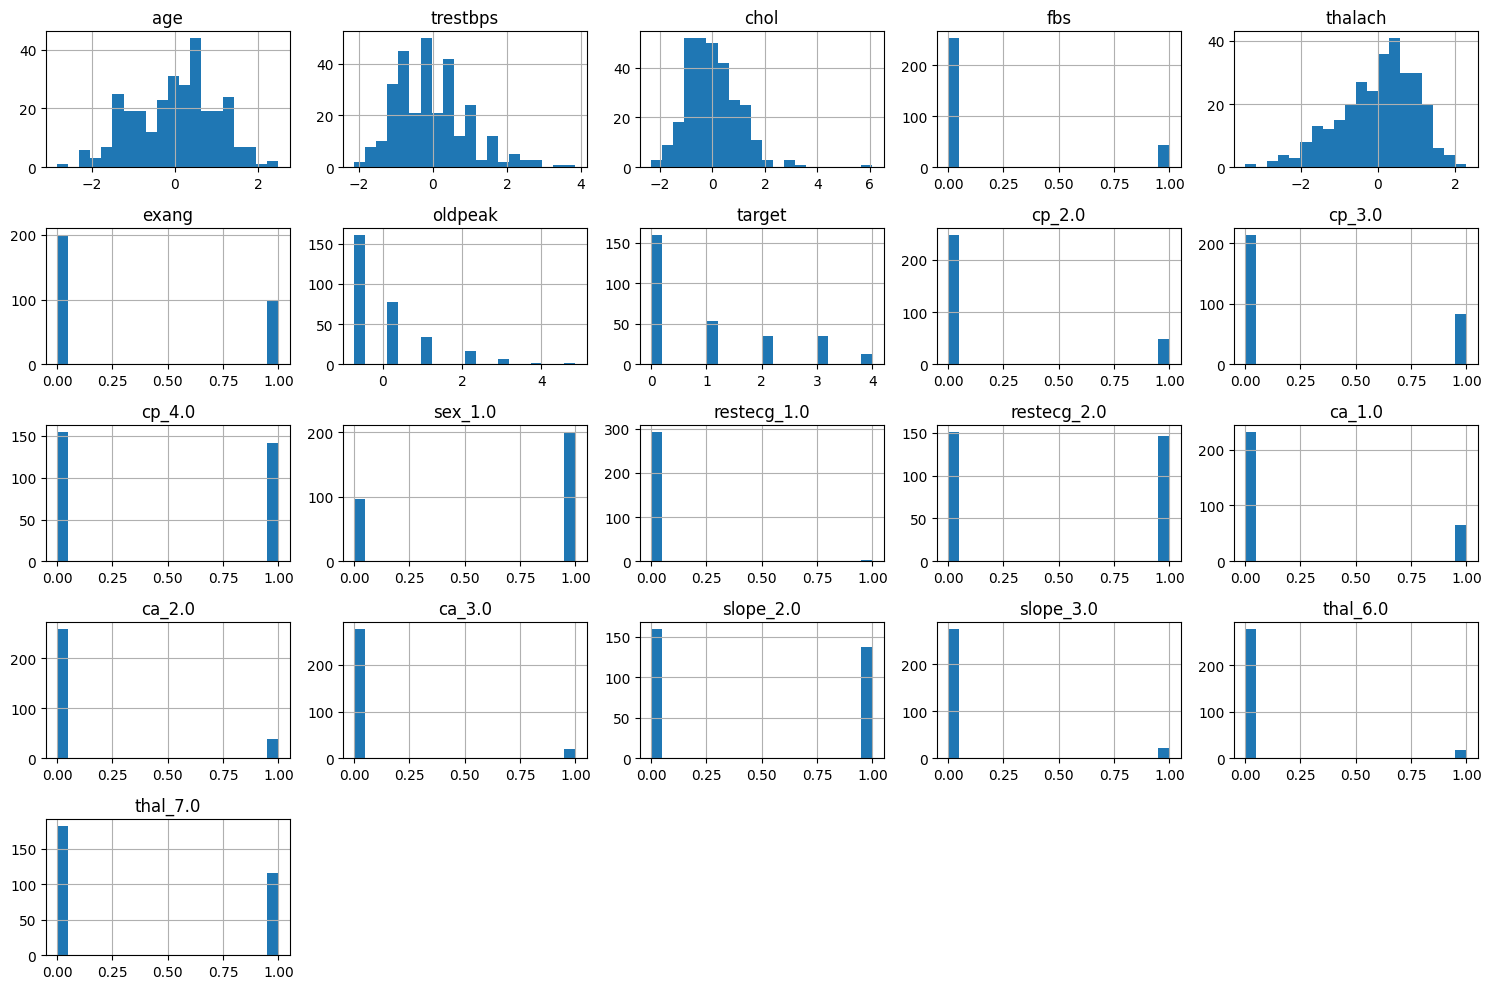

In [ ]:
data_scaled.hist(figsize=(15,10),bins=20)
plt.tight_layout()

**correlation heat map**

<Axes: >

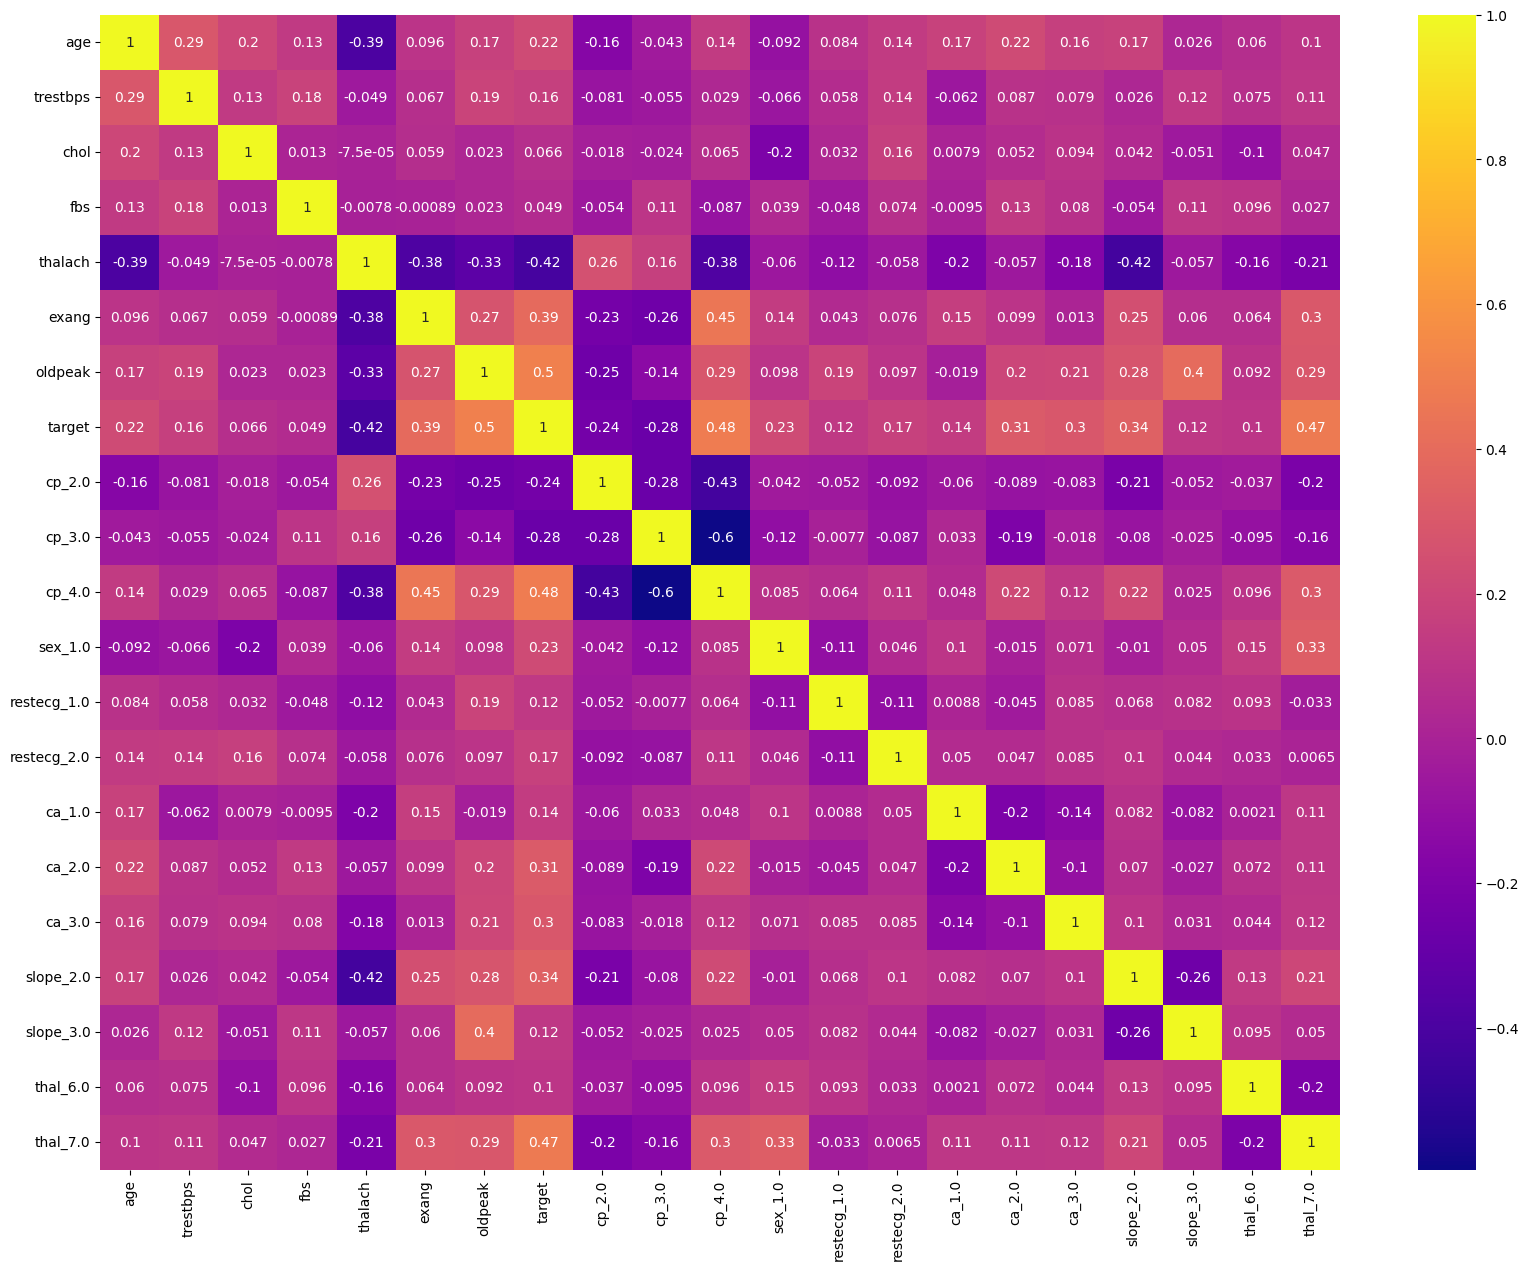

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(data_scaled.corr(),annot=True , cmap='plasma')

**box plot**

/tmp/ipython-input-3891947933.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data , x="target" ,y="age" ,palette="rocket")


<Axes: xlabel='target', ylabel='age'>

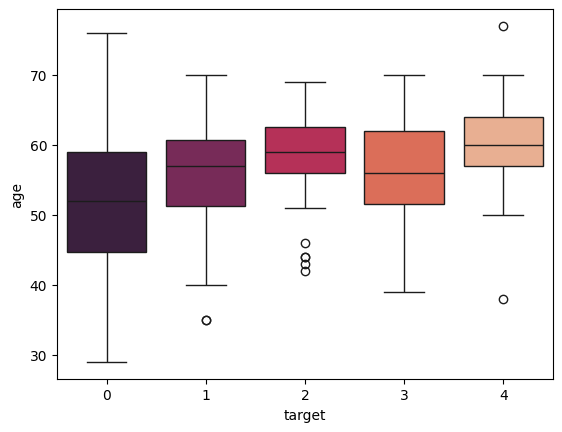

In [ ]:
sns.boxplot(data=data , x="target" ,y="age" ,palette="rocket")